# Hand Written Digits Project

**Data reference link:**

1. [TÜBİTAK Article](https://journals.tubitak.gov.tr/cgi/viewcontent.cgi?article=3717&context=elektrik)
2. [UCI Machine Learning Repository: Pen-Based Recognition of Handwritten Digits Dataset](https://archive.ics.uci.edu/dataset/81/pen+based+recognition+of+handwritten+digits)

# Exploratory Data Analysis

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
import plotly
import plotly.express as px
!pip install cufflinks
import cufflinks as cf  # BU SATIRI EKLEYİN!

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

# Grafikleri göstermek için
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6

# Uyarılardan kurtulmak için
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached colorlover-0.3.0-py3-none-any.whl.metadata (421 bytes)
Using cached colorlover-0.3.0-py3-none-any.whl (8.9 kB)


In [6]:
df_original = pd.read_csv("pendigits_txt.csv")
df = df_original.copy()

In [7]:
df.head()

input1  input2  input3  input4  input5  input6  input7  input8  input9  \
0      47     100      27      81      57      37      26       0       0   
1       0      89      27     100      42      75      29      45      15   
2       0      57      31      68      72      90     100     100      76   
3       0     100       7      92       5      68      19      45      86   
4       0      67      49      83     100     100      81      80      60   

   input10  input11  input12  input13  input14  input15  input16  class  
0       23       56       53      100       90       40       98      8  
1       15       37        0       69        2      100        6      2  
2       75       50       51       28       25       16        0      1  
3       34      100       45       74       23       67        0      4  
4       60       40       40       33       20       47        0      1

In [8]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

In [9]:
summary(df)

Data shape: (10992, 17)
___________________________
Data Types:
Types
int64    17
Name: count, dtype: int64
___________________________


Types  Counts  Uniques  Nulls  Min  Max
class    int64   10992       10      0    0    9
input1   int64   10992      101      0    0  100
input10  int64   10992      101      0    0  100
input11  int64   10992      101      0    0  100
input12  int64   10992      101      0    0  100
input13  int64   10992      101      0    0  100
input14  int64   10992      101      0    0  100
input15  int64   10992      101      0    0  100
input16  int64   10992      101      0    0  100
input2   int64   10992       96      0    0  100
input3   int64   10992      101      0    0  100
input4   int64   10992       98      0    0  100
input5   int64   10992      101      0    0  100
input6   int64   10992      101      0    0  100
input7   int64   10992      101      0    0  100
input8   int64   10992      101      0    0  100
input9   int64   10992      101      0    0  100

In [10]:
def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

In [11]:
duplicate_values(df)

Duplicate check...
There are no duplicated observations in the dataset.


In [12]:
df.describe().T

count       mean        std  min   25%   50%    75%    max
input1   10992.0  38.814320  34.257783  0.0   6.0  32.0   65.0  100.0
input2   10992.0  85.120269  16.218571  0.0  76.0  89.0  100.0  100.0
input3   10992.0  40.605622  26.342984  0.0  20.0  40.0   58.0  100.0
input4   10992.0  83.774199  19.163646  0.0  72.0  91.0  100.0  100.0
input5   10992.0  49.770378  34.100515  0.0  18.0  53.0   78.0  100.0
input6   10992.0  65.573144  26.996688  0.0  49.0  71.0   86.0  100.0
input7   10992.0  51.220251  30.576881  0.0  28.0  53.5   74.0  100.0
input8   10992.0  44.498999  29.906104  0.0  23.0  43.0   64.0  100.0
input9   10992.0  56.868541  34.135530  0.0  29.0  60.0   89.0  100.0
input10  10992.0  33.695961  27.251548  0.0   7.0  33.0   54.0  100.0
input11  10992.0  60.516376  37.288086  0.0  23.0  73.0   97.0  100.0
input12  10992.0  34.826510  27.119982  0.0  11.0  30.0   55.0  100.0
input13  10992.0  55.022289  22.335539  0.0  42.0  53.0   68.0  100.0
input14  10992.0  34.937045  33.155463  0.0   5.0  27.0   47.0  100.0
input15  10992.0  47.287482  41.760400  0.0   0.0  40.0  100.0  100.0
input16  10992.0  28.845342  35.778094  0.0   0.0   9.0   51.0  100.0
class    10992.0   4.431587   2.876947  0.0   2.0   4.0    7.0    9.0

Target Variable

In [14]:
def value_cnt(df, column_name):
    vc = df[column_name].value_counts()
    vc_norm = df[column_name].value_counts(normalize=True)

    vc = vc.rename_axis(column_name).reset_index(name='counts')
    vc_norm = vc_norm.rename_axis(column_name).reset_index(name='norm_counts')

    df_result = pd.concat([vc[column_name], vc['counts'], vc_norm['norm_counts']], axis=1)
    
    return df_result

In [15]:
print(df["class"].value_counts())
print("---------------------")
print(df["class"].value_counts(normalize=True))

class
2    1144
4    1144
1    1143
0    1143
7    1142
6    1056
8    1055
5    1055
9    1055
3    1055
Name: count, dtype: int64
---------------------
class
2    0.104076
4    0.104076
1    0.103985
0    0.103985
7    0.103894
6    0.096070
8    0.095979
5    0.095979
9    0.095979
3    0.095979
Name: proportion, dtype: float64


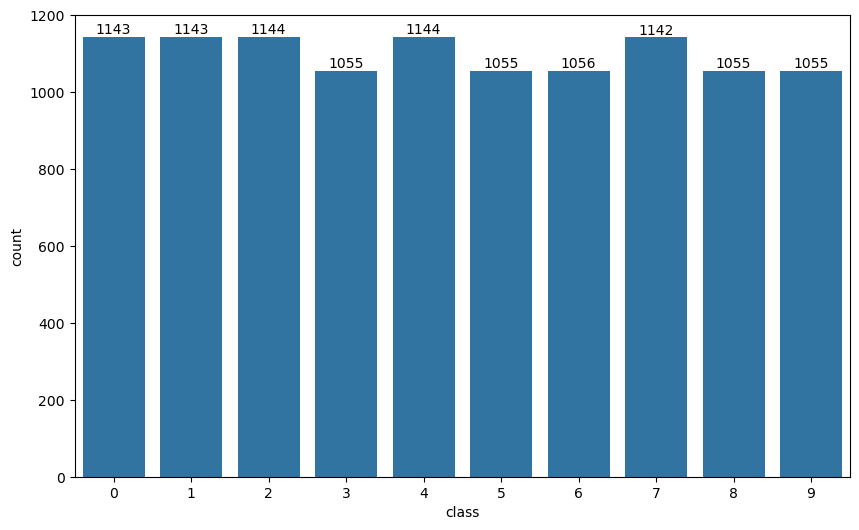

In [16]:
ax = sns.countplot(df, x = "class")
ax.bar_label(ax.containers[0]);

In [17]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [18]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


In [19]:
import cufflinks as cf
import plotly.offline as pyo

In [20]:
init_notebook_mode(connected=True)
cf.go_offline()


In [21]:
#df.iloc[:,:-1].iplot(kind="box")

In [22]:
fig = px.box(df)
fig.show()

In [23]:
df[df["input2"] < 39 ].value_counts().sum()

178

In [24]:
df[df["input4"] < 29].value_counts().sum()

148

In [25]:
df[(df["input2"] < 39) | (df["input4"] < 29)].value_counts().sum()

287

In [26]:
287/10992

0.0261098981077147

In [27]:
df_2 = df[~((df["input2"] < 39) | (df["input4"] < 29))] # bu datayı orjinal datayı denedikten sonra deneyecem.

In [28]:
df_2.shape

(10705, 17)

In [29]:
df.describe().T

count       mean        std  min   25%   50%    75%    max
input1   10992.0  38.814320  34.257783  0.0   6.0  32.0   65.0  100.0
input2   10992.0  85.120269  16.218571  0.0  76.0  89.0  100.0  100.0
input3   10992.0  40.605622  26.342984  0.0  20.0  40.0   58.0  100.0
input4   10992.0  83.774199  19.163646  0.0  72.0  91.0  100.0  100.0
input5   10992.0  49.770378  34.100515  0.0  18.0  53.0   78.0  100.0
input6   10992.0  65.573144  26.996688  0.0  49.0  71.0   86.0  100.0
input7   10992.0  51.220251  30.576881  0.0  28.0  53.5   74.0  100.0
input8   10992.0  44.498999  29.906104  0.0  23.0  43.0   64.0  100.0
input9   10992.0  56.868541  34.135530  0.0  29.0  60.0   89.0  100.0
input10  10992.0  33.695961  27.251548  0.0   7.0  33.0   54.0  100.0
input11  10992.0  60.516376  37.288086  0.0  23.0  73.0   97.0  100.0
input12  10992.0  34.826510  27.119982  0.0  11.0  30.0   55.0  100.0
input13  10992.0  55.022289  22.335539  0.0  42.0  53.0   68.0  100.0
input14  10992.0  34.937045  33.155463  0.0   5.0  27.0   47.0  100.0
input15  10992.0  47.287482  41.760400  0.0   0.0  40.0  100.0  100.0
input16  10992.0  28.845342  35.778094  0.0   0.0   9.0   51.0  100.0
class    10992.0   4.431587   2.876947  0.0   2.0   4.0    7.0    9.0

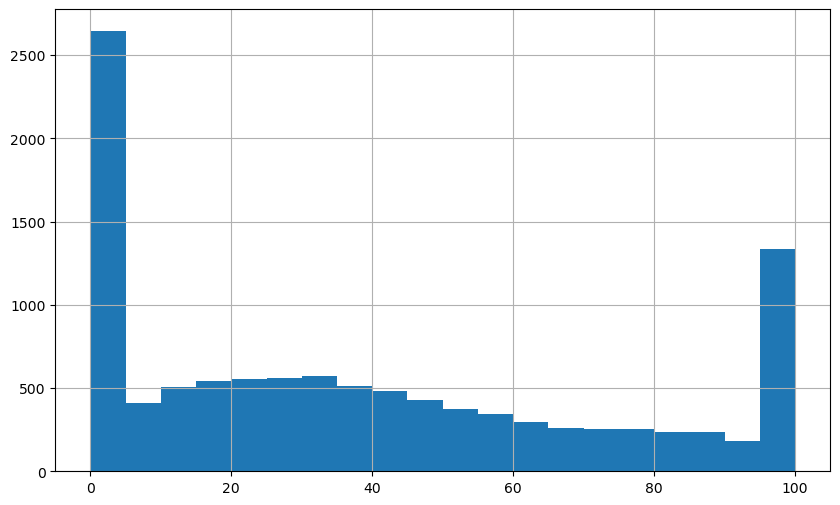

In [30]:
df['input1'].hist(bins = 20);

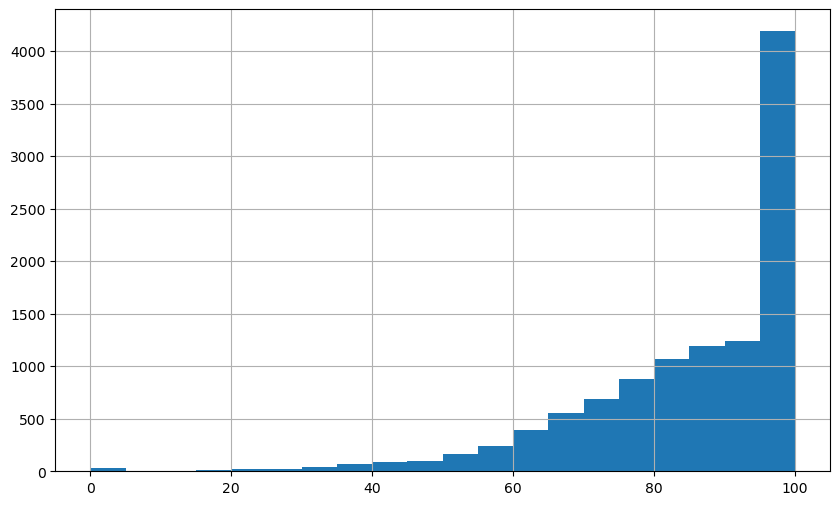

In [31]:
df['input2'].hist(bins = 20);

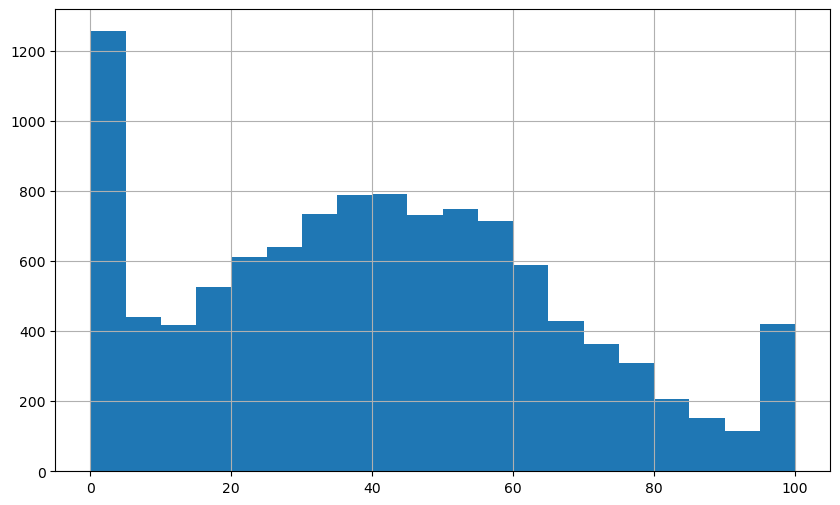

In [32]:
df['input3'].hist(bins = 20);

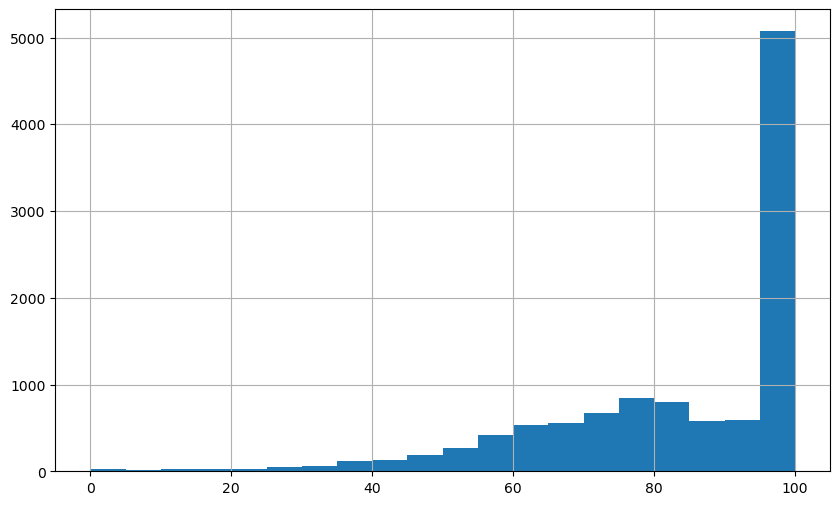

In [33]:
df['input4'].hist(bins = 20);

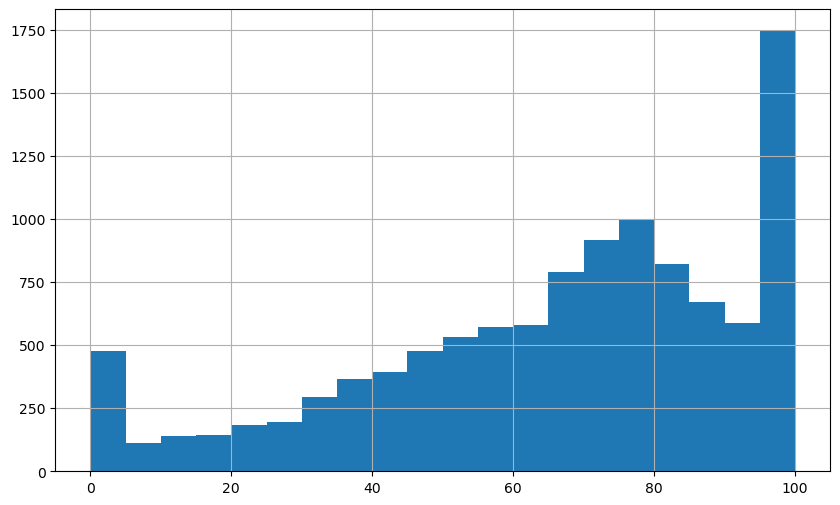

In [34]:
df['input6'].hist(bins = 20);

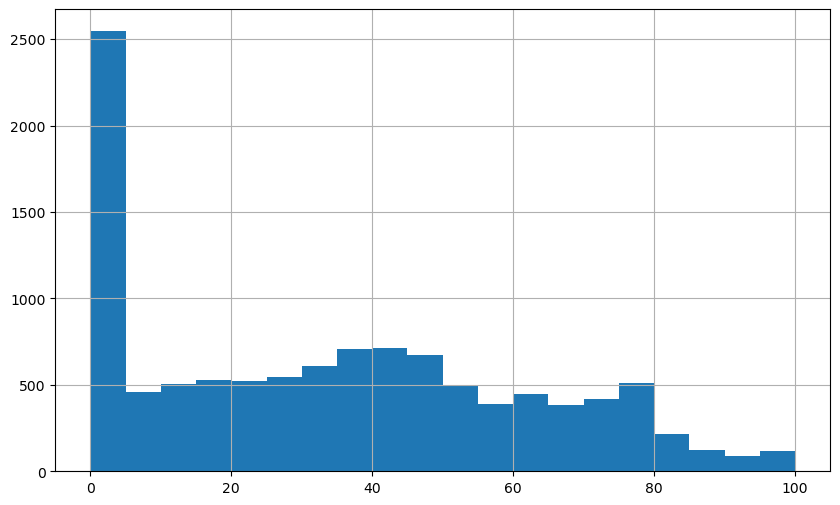

In [35]:
df['input10'].hist(bins = 20);

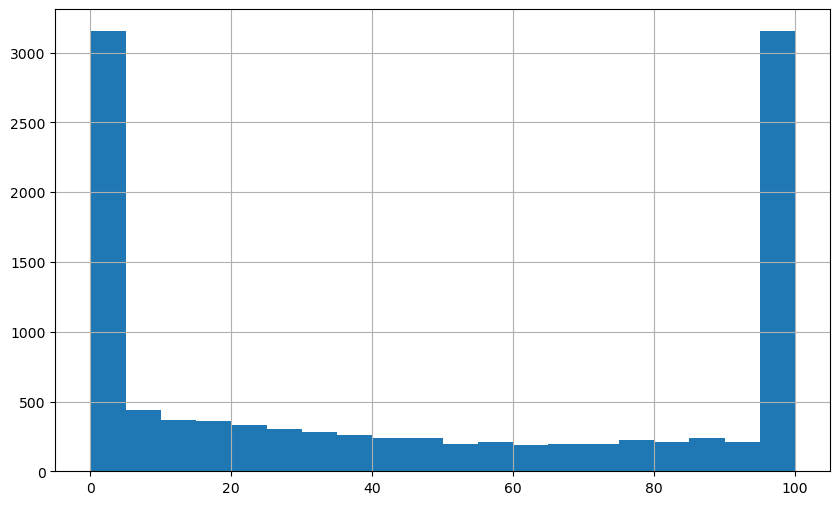

In [36]:
df['input15'].hist(bins = 20);

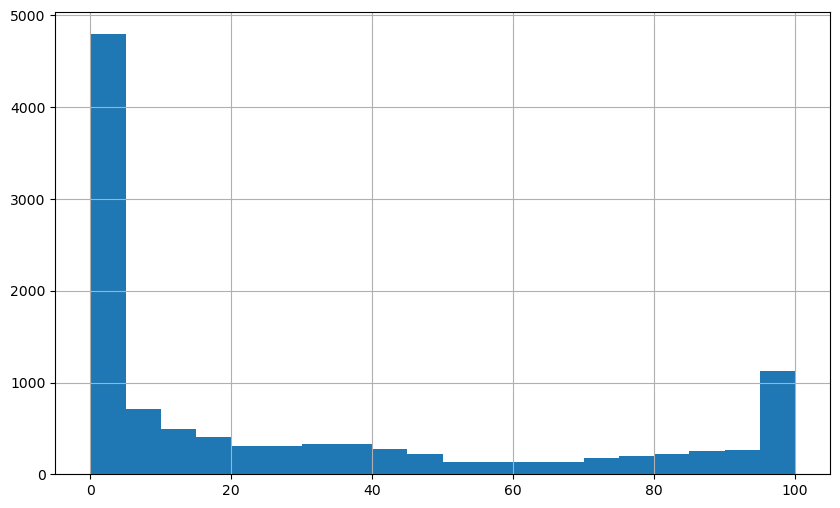

In [37]:
df['input16'].hist(bins = 20);

In [38]:
corr =df.corr()

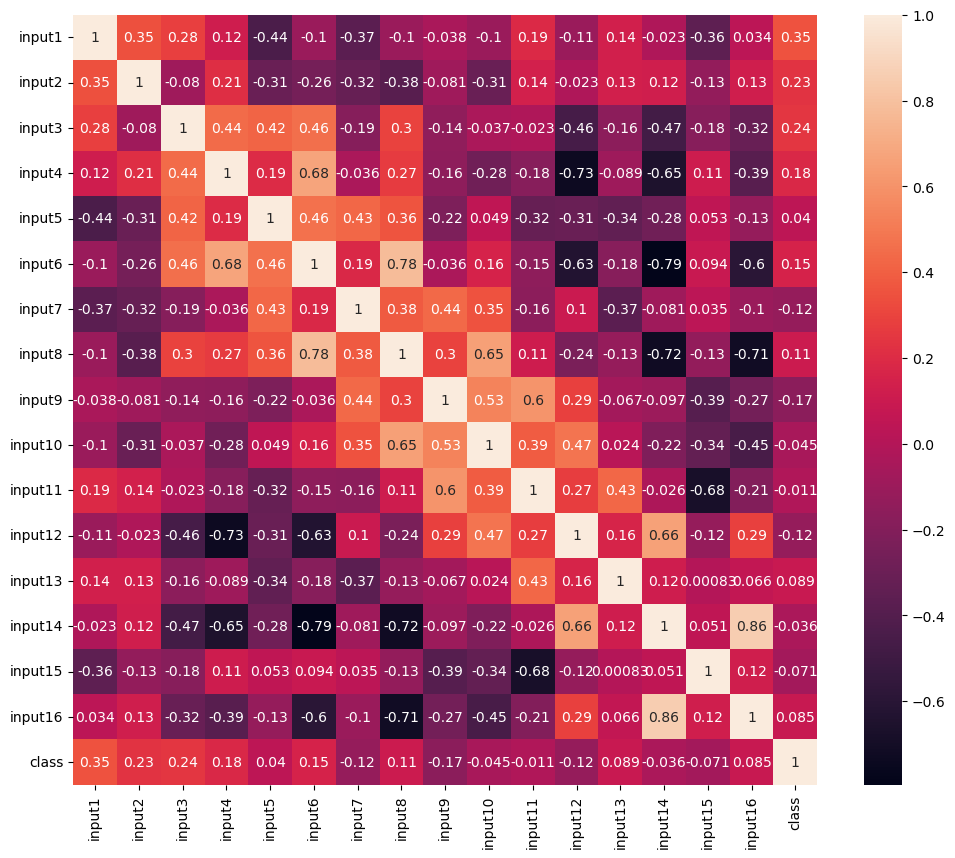

In [39]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot = True);

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, auc

# Support Vector Machine (SVM) Classifier

In [42]:
X = df.drop(columns = "class")
y = df["class"]

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 42 )

In [45]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(8793, 16)
(8793,)
(2199, 16)
(2199,)


In [46]:
from sklearn.svm import SVC

In [47]:
operations = [("scaler", StandardScaler()), ("svm", SVC())]

svn_pipe = Pipeline(steps = operations)

svn_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC())])

In [48]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [49]:
eval_metric(svn_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[240   0   0   0   0   0   0   0   1   0]
 [  0 222   1   0   1   0   0   1   0   0]
 [  0   0 235   0   0   0   0   0   0   0]
 [  0   0   1 223   0   0   0   0   0   0]
 [  0   0   0   0 215   0   0   0   0   0]
 [  0   0   0   1   0 210   0   0   1   1]
 [  0   0   0   0   0   0 199   0   0   0]
 [  0   1   0   0   0   0   0 208   0   0]
 [  0   0   0   0   0   0   0   1 211   0]
 [  0   0   0   0   0   0   0   2   0 224]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       1.00      0.99      0.99       225
           2       0.99      1.00      1.00       235
           3       1.00      1.00      1.00       224
           4       1.00      1.00      1.00       215
           5       1.00      0.99      0.99       213
           6       1.00      1.00      1.00       199
           7       0.98      1.00      0.99       209
           8       0.99      1.00      0.99       212
           9       

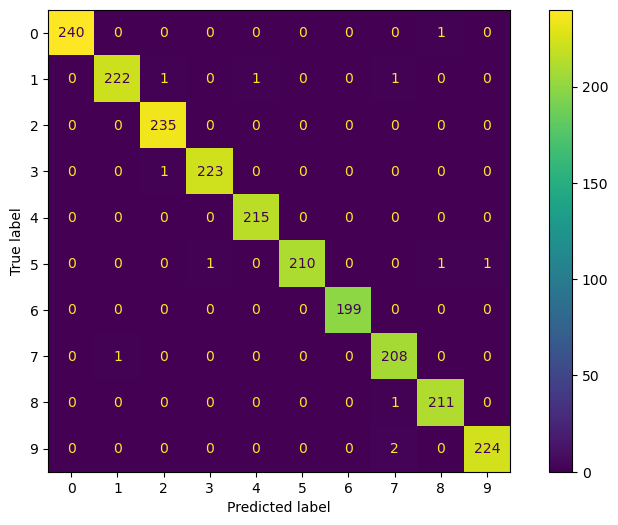

In [50]:
ConfusionMatrixDisplay.from_estimator(svn_pipe, X_test, y_test)

In [51]:
operations = [("scaler", StandardScaler()), ("SVC", SVC())]

pipe_model = Pipeline(steps=operations)
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall': make_scorer(recall_score, average='weighted', zero_division=0),
    'f1': make_scorer(f1_score, average='weighted', zero_division=0)
}
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=cv,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]      

# burada scoring dictinaury ve cv değişlkeni(Kfold) oluşturmadan önce accuracy değerleri haricinde ki diğer değerleri NaN gösterdi. 

test_accuracy      0.994313
train_accuracy     0.996437
test_precision     0.994383
train_precision    0.996441
test_recall        0.994313
train_recall       0.996437
test_f1            0.994313
train_f1           0.996436
dtype: float64

In [52]:
param_grid = {
    'SVC__C': [0.1, 1],  # Küçük ve orta değerler
    'SVC__gamma': ['scale', 0.1],  # scale ve 0.1 değerleri
    'SVC__kernel': ['rbf'],  # Kernel hala aynı
    'SVC__class_weight': ['balanced']  # Dengesiz sınıflar için 'balanced'
}

In [53]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True))]

pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model,
                              param_grid,
                              scoring="recall",
                              cv=5,
                              return_train_score=True,
                              n_jobs=1).fit(X_train, y_train)

In [54]:
svm_model_grid.best_params_

{'SVC__C': 0.1,
 'SVC__class_weight': 'balanced',
 'SVC__gamma': 'scale',
 'SVC__kernel': 'rbf'}

In [55]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[240   0   0   0   0   0   0   0   1   0]
 [  0 210  11   2   1   0   0   1   0   0]
 [  0   3 232   0   0   0   0   0   0   0]
 [  0   0   0 223   0   0   0   1   0   0]
 [  0   0   0   0 213   1   0   1   0   0]
 [  0   0   0   1   0 210   0   0   1   1]
 [  0   0   0   0   0   0 199   0   0   0]
 [  0   3   0   0   0   0   0 206   0   0]
 [  1   0   0   0   0   0   0   1 210   0]
 [  0   1   0   0   1   0   0   1   0 223]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       0.97      0.93      0.95       225
           2       0.95      0.99      0.97       235
           3       0.99      1.00      0.99       224
           4       0.99      0.99      0.99       215
           5       1.00      0.99      0.99       213
           6       1.00      1.00      1.00       199
           7       0.98      0.99      0.98       209
           8       0.99      0.99      0.99       212
           9       

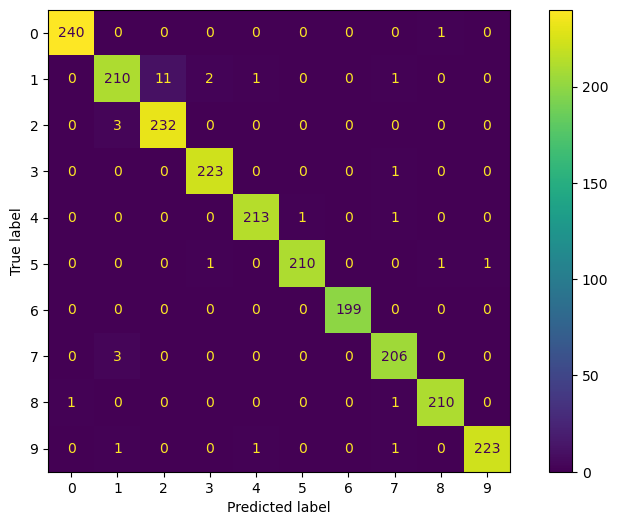

In [56]:
ConfusionMatrixDisplay.from_estimator(svm_model_grid, X_test, y_test)

# Decision Tree (DT) Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [59]:
operations = [("scaler", StandardScaler()), ("DT_Model", DecisionTreeClassifier(random_state = 42))]

DT_model = Pipeline(steps=operations)

In [60]:
DT_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('DT_Model', DecisionTreeClassifier(random_state=42))])

In [61]:
eval_metric(DT_model, X_train, y_train, X_test, y_test)

Test_Set
[[236   0   0   0   0   0   0   0   5   0]
 [  2 209  11   0   1   0   0   1   0   1]
 [  0   5 227   0   0   0   0   3   0   0]
 [  0   3   0 218   0   1   0   1   0   1]
 [  0   1   0   1 208   1   3   0   0   1]
 [  0   0   0   2   0 207   0   1   1   2]
 [  1   1   0   0   0   1 194   0   2   0]
 [  0   2   2   0   0   0   1 201   2   1]
 [  1   0   0   1   0   1   0   0 208   1]
 [  0   1   0   2   1   4   0   3   0 215]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       241
           1       0.94      0.93      0.94       225
           2       0.95      0.97      0.96       235
           3       0.97      0.97      0.97       224
           4       0.99      0.97      0.98       215
           5       0.96      0.97      0.97       213
           6       0.98      0.97      0.98       199
           7       0.96      0.96      0.96       209
           8       0.95      0.98      0.97       212
           9       

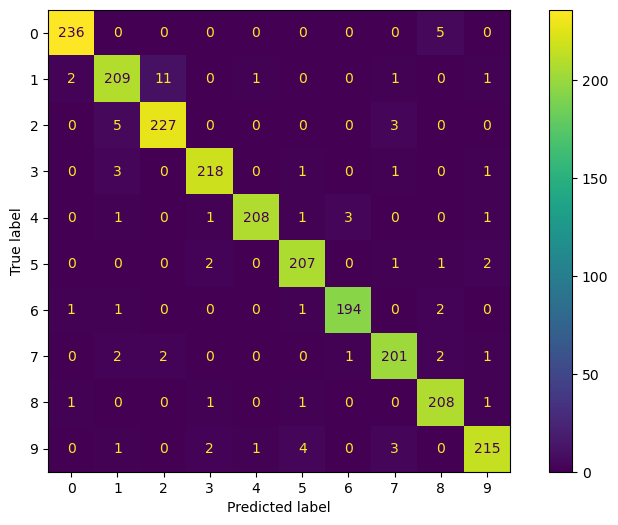

In [62]:
ConfusionMatrixDisplay.from_estimator(DT_model, X_test, y_test)

In [63]:
from sklearn.tree import plot_tree

In [64]:
param_grid = {
    "DT_Model__splitter": ["best"],  # Sadece bir seçenek
    "DT_Model__max_features": [None, "auto"],  # Daha az seçenek
    "DT_Model__max_depth": [3, 5],  # Daha az derinlik seçeneği
    "DT_Model__min_samples_leaf": [2, 3],  # Daha az örnek
    "DT_Model__min_samples_split": [2, 3]  # Daha az seçenek
}

In [65]:
grid_model_DT = GridSearchCV(estimator=DT_model,
                          param_grid=param_grid,
                          scoring='accuracy',
                          cv=5,
                          n_jobs = -1,
                          return_train_score=True)

In [66]:
grid_model_DT.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('DT_Model',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'DT_Model__max_depth': [3, 5],
                         'DT_Model__max_features': [None, 'auto'],
                         'DT_Model__min_samples_leaf': [2, 3],
                         'DT_Model__min_samples_split': [2, 3],
                         'DT_Model__splitter': ['best']},
             return_train_score=True, scoring='accuracy')

In [67]:
grid_model_DT.best_params_

{'DT_Model__max_depth': 5,
 'DT_Model__max_features': None,
 'DT_Model__min_samples_leaf': 3,
 'DT_Model__min_samples_split': 2,
 'DT_Model__splitter': 'best'}

In [68]:
grid_model_DT.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('DT_Model',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=3,
                                        random_state=42))])

In [69]:
eval_metric(grid_model_DT, X_train, y_train, X_test, y_test)

Test_Set
[[229   1   0   0   0   0   0   0  11   0]
 [  0 175  33   3   5   7   0   0   0   2]
 [  0  19 197   5   9   0   0   5   0   0]
 [  0   1   1 218   0   0   3   0   1   0]
 [  1   3   0   1 200   7   2   0   0   1]
 [  0   1   0  42   0 163   0   1   0   6]
 [  1   3   2   5   0   2 184   0   2   0]
 [  1   5   2  26   0   0   0 154  14   7]
 [  2   4   1   0   0   2   1   0 202   0]
 [  0  87   0  31   4  12   3   0   0  89]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       241
           1       0.59      0.78      0.67       225
           2       0.83      0.84      0.84       235
           3       0.66      0.97      0.79       224
           4       0.92      0.93      0.92       215
           5       0.84      0.77      0.80       213
           6       0.95      0.92      0.94       199
           7       0.96      0.74      0.83       209
           8       0.88      0.95      0.91       212
           9       

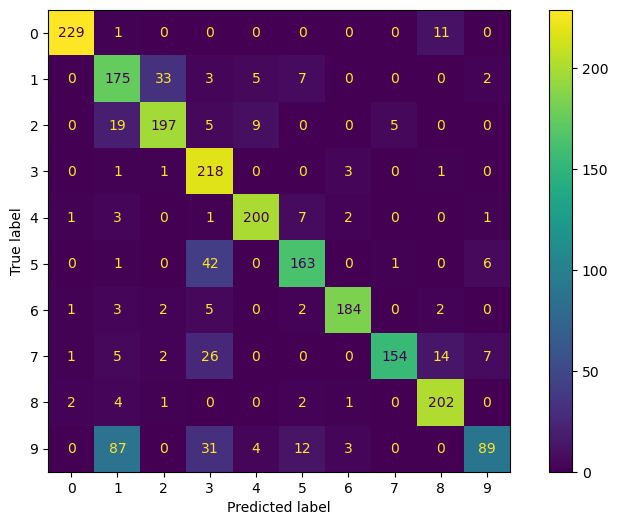

In [70]:
ConfusionMatrixDisplay.from_estimator(grid_model_DT, X_test, y_test)

In [71]:
model = DecisionTreeClassifier(min_samples_split=3, random_state=42)
model.fit(X_train, y_train)
model.feature_importances_

array([0.07295169, 0.0614197 , 0.02877182, 0.05716928, 0.07703823,
       0.02585488, 0.02299929, 0.01955403, 0.08480704, 0.11614284,
       0.07520324, 0.01904942, 0.03934793, 0.11335567, 0.09433715,
       0.09199779])

In [72]:
feats = pd.DataFrame(index=X.columns, data= model.feature_importances_, columns=['ada_importance'])
ada_imp_feats = feats.sort_values("ada_importance", ascending = False)
ada_imp_feats

ada_importance
input10        0.116143
input14        0.113356
input15        0.094337
input16        0.091998
input9         0.084807
input5         0.077038
input11        0.075203
input1         0.072952
input2         0.061420
input4         0.057169
input13        0.039348
input3         0.028772
input6         0.025855
input7         0.022999
input8         0.019554
input12        0.019049

# Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
operations = [("scaler", StandardScaler()), ("random_forest", RandomForestClassifier(random_state = 42))]

RF_model = Pipeline(steps=operations)

In [76]:
RF_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('random_forest', RandomForestClassifier(random_state=42))])

In [77]:
eval_metric(RF_model, X_train, y_train, X_test, y_test)

Test_Set
[[240   0   0   0   0   0   0   0   1   0]
 [  0 221   3   0   1   0   0   0   0   0]
 [  0   0 235   0   0   0   0   0   0   0]
 [  0   0   0 222   0   1   0   1   0   0]
 [  0   0   0   0 215   0   0   0   0   0]
 [  0   0   0   1   0 210   0   0   1   1]
 [  0   0   0   0   0   0 199   0   0   0]
 [  0   0   0   0   0   0   0 209   0   0]
 [  0   0   0   0   0   0   0   1 211   0]
 [  0   1   0   0   1   0   0   1   0 223]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       1.00      0.98      0.99       225
           2       0.99      1.00      0.99       235
           3       1.00      0.99      0.99       224
           4       0.99      1.00      1.00       215
           5       1.00      0.99      0.99       213
           6       1.00      1.00      1.00       199
           7       0.99      1.00      0.99       209
           8       0.99      1.00      0.99       212
           9       

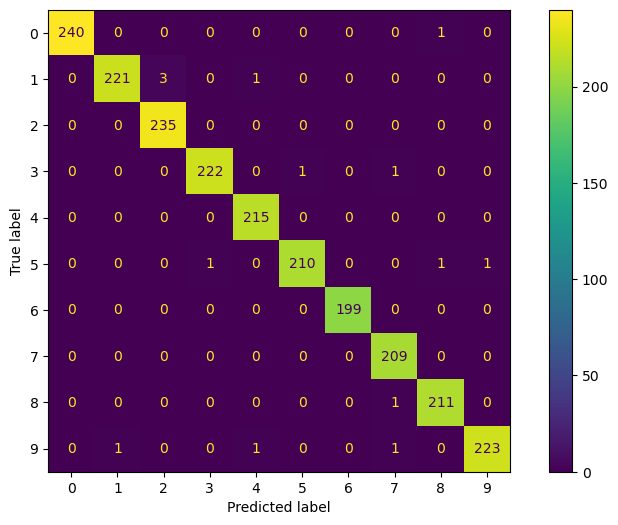

In [78]:
ConfusionMatrixDisplay.from_estimator(RF_model, X_test, y_test)

In [79]:
param_grid = {'n_estimators':[64, 128, 200],
             'max_features':[2, 4, 'sqrt'],
             'max_depth':[1,2, 3, 4],
             'min_samples_split':[1,2,3,4],
             'min_samples_leaf': [1,2,3,4],
             'max_samples':[0,6,0.8, 1]}

In [80]:
model = RandomForestClassifier(random_state=42)
RF_grid_model = GridSearchCV(model, param_grid, scoring = "accuracy", n_jobs = -1, verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


In [81]:
RF_grid_model.best_params_

{'max_depth': 4,
 'max_features': 2,
 'max_samples': 0.8,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [82]:
RF_grid_model.best_score_

0.8793352697422844

In [83]:
eval_metric(RF_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[224   2   0   0   0   0   2   0  13   0]
 [  0 171  47   3   1   0   1   0   0   2]
 [  0   6 225   1   0   0   0   3   0   0]
 [  0   3   0 221   0   0   0   0   0   0]
 [  0   1   0   1 212   0   1   0   0   0]
 [  0   0   0  39   0 128   4   0   2  40]
 [  0   0   1   0   1   0 197   0   0   0]
 [  0  21   0   4   0   0   2 177   0   5]
 [  9   5   0   2   0   0   0  10 185   1]
 [  3  14   0  14   6   0   0   0   0 189]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       241
           1       0.77      0.76      0.76       225
           2       0.82      0.96      0.89       235
           3       0.78      0.99      0.87       224
           4       0.96      0.99      0.97       215
           5       1.00      0.60      0.75       213
           6       0.95      0.99      0.97       199
           7       0.93      0.85      0.89       209
           8       0.93      0.87      0.90       212
           9       

In [84]:
X_2 = df_2.drop(columns = "class")
y_2 = df_2["class"] # outliner değerleri çıkartılarak tekrar denendi.

In [85]:
X_train2, X_test2, y_train2,y_test2 = train_test_split(X_2, y_2, test_size = 0.2, random_state = 42)

In [86]:
param_grid = {'n_estimators':[64, 128, 200],
             'max_features':[2, 4, 'sqrt'],
             'max_depth':[1,2, 3, 4],
             'min_samples_split':[1,2,3,4],
             'min_samples_leaf': [1,2,3,4],
             'max_samples':[0,6,0.8, 1]}

In [87]:
model = RandomForestClassifier(random_state=42)
RF_grid_model = GridSearchCV(model, param_grid, scoring = "accuracy", n_jobs = -1, verbose=2).fit(X_train2, y_train2)

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


In [88]:
eval_metric(RF_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[227   1   0   0   1   0   1   0  11   0]
 [  0 169  49   3   2   0   0   0   0   2]
 [  0   3 229   0   0   0   0   3   0   0]
 [  0   2   0 222   0   0   0   0   0   0]
 [  0   0   0   0 214   0   0   0   0   1]
 [  0   0   0  36   0 128   2   0   2  45]
 [  0   0   1   0   0   0 198   0   0   0]
 [  0  20   1   2   0   0   2 178   0   6]
 [  8   3   1   1   0   0   0   9 187   3]
 [  3   5   0  10   6   0   0   0   0 202]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       241
           1       0.83      0.75      0.79       225
           2       0.81      0.97      0.89       235
           3       0.81      0.99      0.89       224
           4       0.96      1.00      0.98       215
           5       1.00      0.60      0.75       213
           6       0.98      0.99      0.99       199
           7       0.94      0.85      0.89       209
           8       0.94      0.88      0.91       212
           9       

# Choose the Best Model

In [90]:
svm_model_grid.best_params_

{'SVC__C': 0.1,
 'SVC__class_weight': 'balanced',
 'SVC__gamma': 'scale',
 'SVC__kernel': 'rbf'}

In [91]:
operations = [("scaler", StandardScaler()), ("svm", SVC(C = 0.1, gamma = 'scale', kernel = 'rbf', class_weight = 'balanced'))]

svn_pipe = Pipeline(steps = operations)

svn_pipe.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(C=0.1, class_weight='balanced'))])